In [101]:
#Import packages
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.503533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
#Define dataset and clean
cal = pd.read_csv("calories.csv")
cal['Gender'] = cal['Gender'].map({'male': 0, 'female': 1})
cal=cal.drop(["User_ID"], axis=1)
cal.describe(

In [102]:
#Create training and test set, scale
X=cal.drop(['Calories'], axis=1)
y=cal["Calories"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Best k: 10
Lowest Test MSE: 23.530423333333335


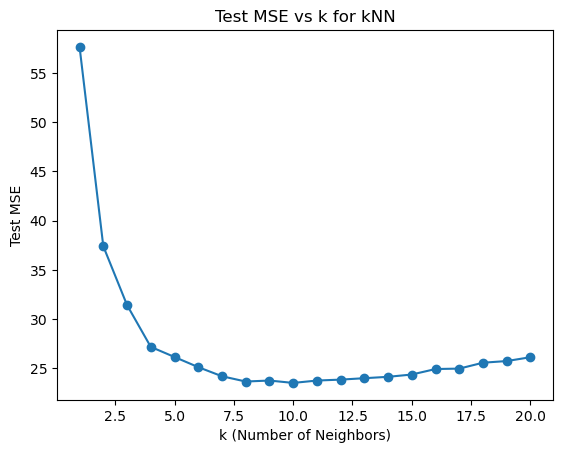

In [103]:
# Prep variables for the for loop
k_values = range(1, 21)

best_k = None
lowest_mse = float('inf')


mse_values = []

# Loop over different values of k
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    if mse < lowest_mse:
        lowest_mse = mse
        best_k = k

# Output k with lowest MSE
print(f"Best k: {best_k}")
print(f"Lowest Test MSE: {lowest_mse}")

# Plot MSE for each k value
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test MSE')
plt.title('Test MSE vs k for kNN')
plt.show()


In [104]:
#Calculate MAE
#Fit model
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

#Predict y-values
y_pred = model.predict(X_test)

# Calculate
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 4.795533333333333


In [97]:
#Calculate R^2
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9867978009272159

Exploratory analysis of 2nd dataset (used to test generalizability)

In [ ]:
#Load 2nd dataset (unmodified)
gym = pd.read_csv("gym_nonimputed.csv")

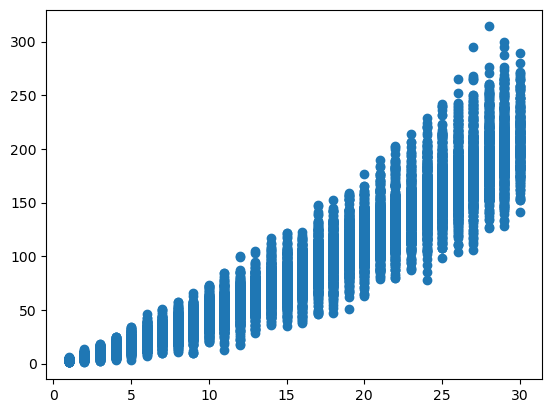

In [59]:
#Duration vs Calories in original dataset
plt.scatter(cal["Duration"], cal["Calories"])

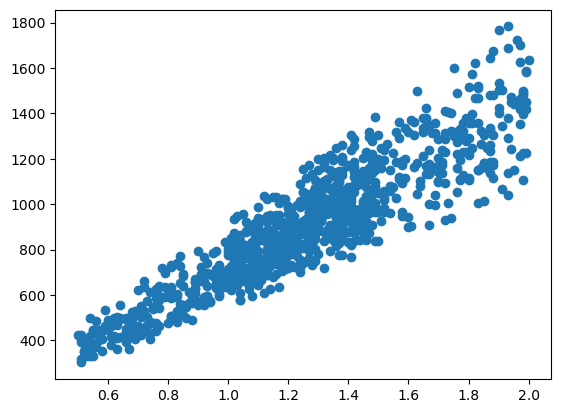

In [66]:
#Duration vs Calories in 2nd dataset
plt.scatter(gym["Session_Duration (hours)"], gym["Calories_Burned"])

Imputed kNN

In [105]:
#Load the 2nd dataset (version with imputed data)
imputed = pd.read_csv("gym_imputed.csv")

In [106]:
#Assign X and y, scale dataset
X=imputed.drop(['Calories'], axis=1)
y=imputed["Calories"]

scaler = StandardScaler()
X_imp_scaled = scaler.fit_transform(X)   

X_imp_scaled = pd.DataFrame(X_imp_scaled, columns=X.columns)

In [107]:
# Fit data on original kNN model and print results
imp_pred = model.predict(X)
test_mse = mean_squared_error(y, imp_pred)
mae = mean_absolute_error(y, imp_pred)
print("Imp Test MSE:", test_mse)
print("Imp Test MAE:", mae)

Imp Test MSE: 530200.3095683453
Imp Test MAE: 676.1246659815006


Not Imputed

In [112]:
#Load 2nd dataset (unmodified)
gym = pd.read_csv("gym_nonimputed.csv")

In [113]:
# Set X and y, split into train and test, scale
X=gym.drop(['Calories'], axis=1)
y=gym["Calories"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Best k: 3
Lowest Test MSE: 5179.805698005698


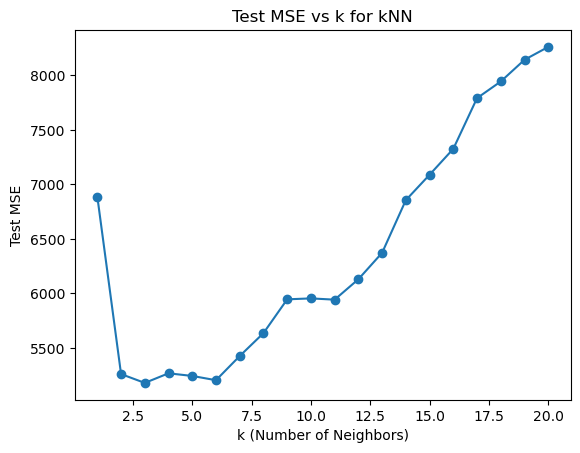

In [114]:
#Fit kNN model to nonimputed data

# Prep variables for the for loop
k_values = range(1, 21)

best_k = None
lowest_mse = float('inf')


mse_values = []

# Loop over different values of k
for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    if mse < lowest_mse:
        lowest_mse = mse
        best_k = k

# Output k with lowest MSE
print(f"Best k: {best_k}")
print(f"Lowest Test MSE: {lowest_mse}")

# Plot MSE for each k value
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Test MSE')
plt.title('Test MSE vs k for kNN')
plt.show()

In [111]:
#Calculate MAE
#Fit model
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train)

#Predict y-values
y_pred = model.predict(X_test)

# Calculate
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

MAE: 49.47179487179487
